In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import bnlearn as bn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from pgmpy.models import BayesianNetwork

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('sgb.csv')

train['Passenger ID'] = train.index

# Atau, tambahkan kolom "Passenger ID" dengan nilai unik (misalnya, nomor urut)
train['Passenger ID'] = range(1, len(train) + 1)

cols = list(train.columns)
cols = ['Passenger ID'] + [col for col in cols if col != 'Passenger ID']
train = train[cols]

train.set_index('Passenger ID', inplace=True)

# Tampilkan trainFrame
train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Stadion Gelora Bung Tomo
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,Tunjungan Plaza,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,0,0,1,0
2,Tunjungan Plaza,1,1,1,1,1,1,1,0,0,...,1,0,0,0,1,1,0,0,1,0
3,Tunjungan Plaza,1,0,1,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,Tunjungan Plaza,1,1,1,1,0,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
5,Tunjungan Plaza,1,1,1,1,0,1,1,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,Balai Pemuda Alun - Alun Surabaya,1,0,1,1,0,1,1,1,0,...,0,1,1,0,1,0,0,0,0,0
1347,Balai Pemuda Alun - Alun Surabaya,1,1,1,1,0,1,1,1,1,...,0,1,1,0,1,0,0,0,0,0
1348,Balai Pemuda Alun - Alun Surabaya,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,0,0,1,1,0


In [3]:
drop_list = ['Aktivitas Wisata', 'Nama Wisata']

train_wisata = train.drop(columns=drop_list)
train_wisata

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Stadion Gelora Bung Tomo
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,0,...,1,1,0,0,1,1,0,0,1,0
2,1,1,1,1,1,1,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
3,1,0,1,1,1,1,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,1,1,1,1,0,0,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
5,1,1,1,1,0,1,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1,0,1,1,0,1,1,1,0,0,...,0,1,1,0,1,0,0,0,0,0
1347,1,1,1,1,0,1,1,1,1,0,...,0,1,1,0,1,0,0,0,0,0
1348,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,0,0,1,1,0


In [4]:
dfhot_train, dfnum_train = bn.df2onehot(train_wisata)



[df2onehot] >Auto detecting dtypes.


100%|██████████| 24/24 [00:00<00:00, 155.85it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 24/24 [00:00<00:00, 274.68it/s]

[df2onehot] >Total onehot features: 48


In [5]:
dfnum_target = dfnum_train.pop('Stadion Gelora Bung Tomo')
dfnum_target

0       0
1       0
2       0
3       0
4       0
       ..
1345    0
1346    0
1347    0
1348    0
1349    0
Name: Stadion Gelora Bung Tomo, Length: 1350, dtype: int32

In [6]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size=0.2, random_state=0)
valid = pd.concat([Xval, Zval], axis='columns')
dfnum = pd.concat([Xtrain, Ztrain], axis='columns')
dfnum

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Stadion Gelora Bung Tomo
1118,1,1,0,1,0,1,0,1,1,1,...,0,0,1,0,1,0,0,0,1,0
642,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,0,0,0
687,1,1,0,1,0,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
322,1,0,1,1,1,0,1,0,1,1,...,1,0,0,0,1,0,0,1,1,0
326,0,0,1,1,1,1,0,0,0,1,...,1,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
835,1,1,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1216,1,1,0,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
559,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,0,1,1,0


In [7]:
edges = [
    ('Escape', 'Stadion Gelora Bung Tomo'),
    ('Relaxation', 'Stadion Gelora Bung Tomo'),
    ('Play', 'Stadion Gelora Bung Tomo'),
    ('Strenghthening family bonds', 'Stadion Gelora Bung Tomo'),
    ('Prestige', 'Stadion Gelora Bung Tomo'),
    ('Social Interaction', 'Stadion Gelora Bung Tomo'),
    ('Romance', 'Stadion Gelora Bung Tomo'),
    ('Educational Opportunity', 'Stadion Gelora Bung Tomo'),
    ('Self-fulfilment', 'Stadion Gelora Bung Tomo'),
    ('Wish-fulfiment', 'Stadion Gelora Bung Tomo'),
    ('Lingkungan', 'Stadion Gelora Bung Tomo'),
    ('Infrastruktur', 'Stadion Gelora Bung Tomo'),
    ('Fasilitas', 'Stadion Gelora Bung Tomo'),
    ('Akomodasi', 'Stadion Gelora Bung Tomo'),
    ('Stadion Gelora Bung Tomo', 'Makan Bersama'),
    ('Stadion Gelora Bung Tomo', 'Berolahraga'),
    ('Stadion Gelora Bung Tomo', 'Belajar'),
    ('Stadion Gelora Bung Tomo', 'Berinteraksi dengan satwa'),
    ('Stadion Gelora Bung Tomo', 'Mengambil Foto'),
    ('Stadion Gelora Bung Tomo', 'Beribadah'),
    ('Stadion Gelora Bung Tomo', 'Berkemah'),
    ('Stadion Gelora Bung Tomo', 'Melihat Pemandangan'),
    ('Stadion Gelora Bung Tomo', 'Berbelanja')
]

In [8]:
params_static = {
    'figsize': (15, 10),
    'width': 20,  # Menyesuaikan lebar panah
    'edge_alpha': 0.5,  # Menyesuaikan kejelasan panah
    'arrowstyle': '-|>',  # Gaya panah (ubah sesuai kebutuhan)
    'arrowsize': 20,  # Ukuran panah
    'minscale': 5,
    'maxscale': 15,
    'layout': 'spring_layout',
    'font_size': 14,
    'font_family': 'sans-serif',
    'alpha': 0.8,
    'node_shape': 'o',
    'font_color': '#000000',
    'facecolor': 'white',
    'visible': True
}

[bnlearn] >No CPDs to print. Hint: Add CPDs as following: <bn.make_DAG(DAG, CPD=[cpd_A, cpd_B, etc])> and use bnlearn.plot(DAG) to make a plot.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


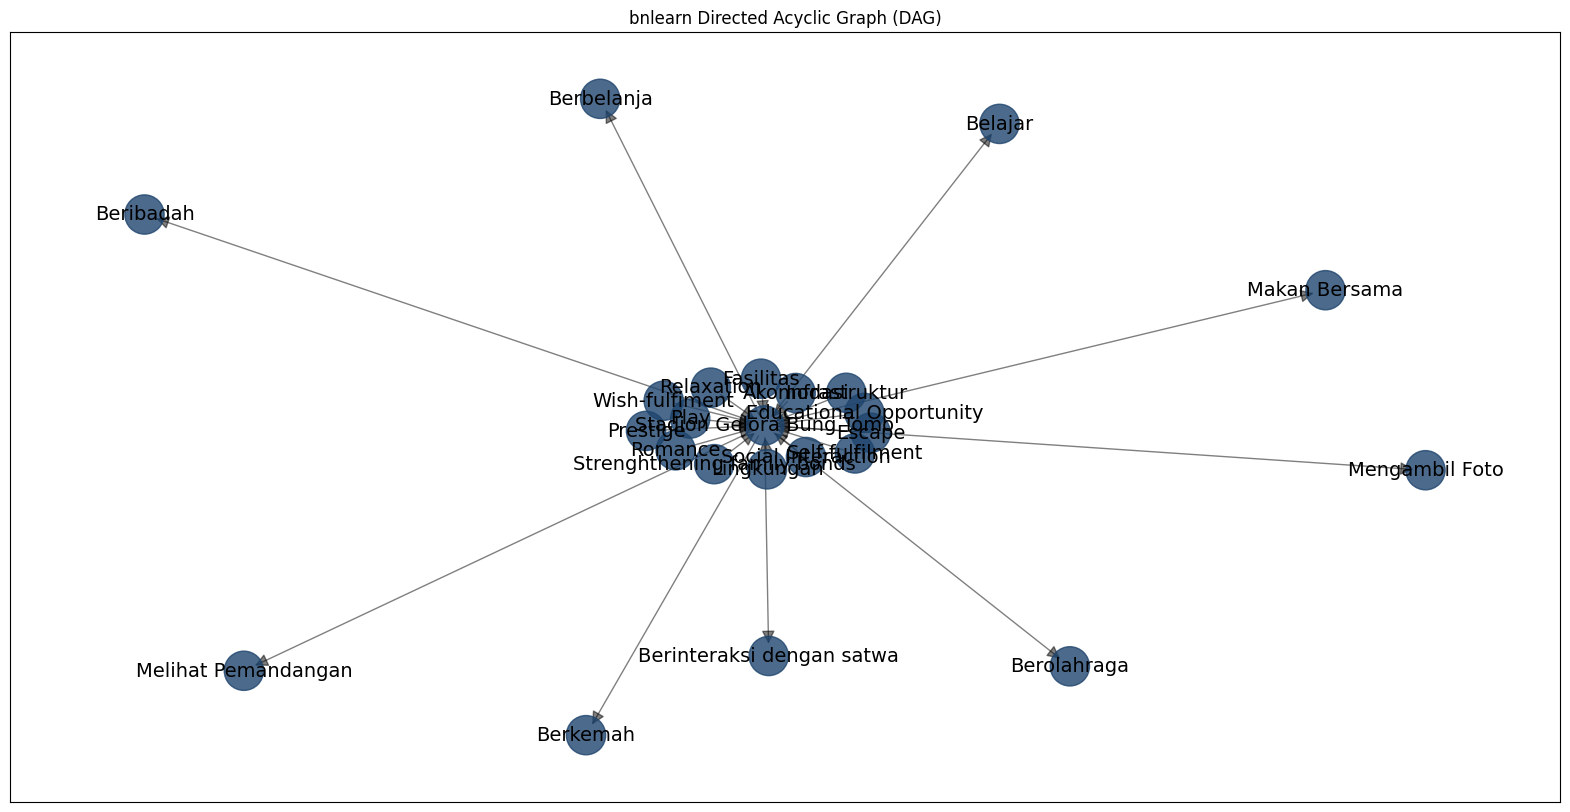

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Escape:
+-----------+----------+
| Escape(0) | 0.299038 |
+-----------+----------+
| Escape(1) | 0.700962 |
+-----------+----------+
[bnlearn] >CPD of Stadion Gelora Bung Tomo:
+-----------------------------+-----+--------------------------------+
| Akomodasi                   | ... | Akomodasi(1)                   |
+-----------------------------+-----+--------------------------------+
| Educational Opportunity     | ... | Educational Opportunity(1)     |
+-----------------------------+-----+--------------------------------+
| Escape                      | ... | Escape(1)                      |
+-----------------------------+-----+--------------------------------+
| Fasilitas                   | ... | Fasilitas(1)                   |
+-----------------------------+-----+--------------------------------+
| Infrastruktur               | ... | Infrastruktur(1)               |
+----------------------------

In [9]:
DAG = bn.make_DAG(edges, verbose=0)


bn.print_CPD(DAG)


# Plot
G = bn.plot(DAG, interactive=False, params_static=params_static)


# Parameter learning
model = bn.parameter_learning.fit(DAG, dfnum, verbose=3);



In [10]:
def get_acc(model, df, col):
    # Get accuracy score by the model for the validation dataset df with target col
    pred = bn.predict(model, df, variables=[col])
    acc = accuracy_score(df[col], pred[col])
    print('Accuracy -', acc)
    return acc

In [11]:
get_acc(model, valid, 'Stadion Gelora Bung Tomo')

[bnlearn]> Remaining columns for inference: 23


  0%|          | 0/254 [00:00<?, ?it/s]

  8%|▊         | 20/254 [00:00<00:01, 193.70it/s]

+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.9680 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.0320 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.9999 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.0001 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion 

 24%|██▎       | 60/254 [00:00<00:01, 177.98it/s]

+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.9974 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.0026 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.8589 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.1411 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion 

 39%|███▊      | 98/254 [00:00<00:00, 182.62it/s]

+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.1958 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.8042 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.9991 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.0009 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion 

 54%|█████▎    | 136/254 [00:00<00:00, 178.77it/s]

+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.8033 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.1967 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.9928 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.0072 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion 

 68%|██████▊   | 173/254 [00:00<00:00, 177.06it/s]

+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.9925 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.0075 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.9994 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.0006 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion 

 82%|████████▏ | 209/254 [00:01<00:00, 153.69it/s]

+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.8811 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.1189 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.8258 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.1742 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion 

100%|██████████| 254/254 [00:01<00:00, 172.98it/s]

+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.7963 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.2037 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo    |   phi(Stadion Gelora Bung Tomo) |
+=============================+=================================+
| Stadion Gelora Bung Tomo(0) |                          0.7084 |
+-----------------------------+---------------------------------+
| Stadion Gelora Bung Tomo(1) |                          0.2916 |
+-----------------------------+---------------------------------+
+-----------------------------+---------------------------------+
| Stadion 

0.937037037037037